<a href="https://colab.research.google.com/github/lhmtri18/analysis_ml_dl_python/blob/master/January_flight_delay_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This analyze the dataset January flight delay prediction from Kaggle.com 


https://www.kaggle.com/divyansh22/flight-delay-prediction?select=Jan_2019_ontime.csv

In [0]:
 ! pip install -q kaggle
from google.colab import files

Get API from Kaggle to download **dataset**

In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trlhunhminh","key":"9193d2a2d5ae057c725abeaedf88abc8"}'}

In [0]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d divyansh22/flight-delay-prediction

flight-delay-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
from zipfile import ZipFile

file_name='flight-delay-prediction.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import pandas as pd
Jan_2019_ontime= pd.read_csv('/content/Jan_2019_ontime.csv')
Jan_2020_ontime= pd.read_csv('/content/Jan_2020_ontime.csv')
print(Jan_2019_ontime.head())
print(Jan_2020_ontime.head())

   DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  ...  DIVERTED DISTANCE Unnamed: 21
0             1            2                9E  ...       0.0    300.0         NaN
1             1            2                9E  ...       0.0    596.0         NaN
2             1            2                9E  ...       0.0    229.0         NaN
3             1            2                9E  ...       0.0    223.0         NaN
4             1            2                9E  ...       0.0    579.0         NaN

[5 rows x 22 columns]
   DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  ...  DIVERTED DISTANCE Unnamed: 21
0             1            3                EV  ...       0.0    174.0         NaN
1             1            3                EV  ...       0.0    585.0         NaN
2             1            3                EV  ...       0.0    631.0         NaN
3             1            3                EV  ...       0.0    253.0         NaN
4             1            3                EV  ...       0.0   

In [0]:
print(Jan_2019_ontime.columns)
print(Jan_2020_ontime.columns)

Same columns


In [0]:
print(Jan_2019_ontime.shape)
print(Jan_2020_ontime.shape)

In [0]:
#convert float to int
#type(Jan_2019_ontime)
#Jan_2019_ontime['CANCELLED']= int(round(Jan_2019_ontime['CANCELLED']))
#Jan_2020_ontime['CANCELLED']= int(round(Jan_2020_ontime['CANCELLED']))
#Jan_2019_ontime['CANCELLED'].head(20)
Jan_2019_cancelled= Jan_2019_ontime[Jan_2019_ontime['CANCELLED']==1.]
Jan_2020_cancelled= Jan_2020_ontime[Jan_2020_ontime['CANCELLED']==1.]
print('Rate cancelled flight in 2019 is: %.20f' %(len(Jan_2019_cancelled)/len(Jan_2019_ontime)*100),'%')
print('Rate cancelled flight in 2020 is: %.20f ' %(len(Jan_2020_cancelled)/len(Jan_2020_ontime)*100),'%')

Rate cancelled flight in 2019 is: 2.86411466047929286205 %
Rate cancelled flight in 2020 is: 1.14070068791100953653  %


**Rate cancelled flight in 2020 decrease compared with it in 2019**

In [0]:
nb_flight_by_daymonth_2019= Jan_2019_ontime.groupby('DAY_OF_MONTH')['DAY_OF_MONTH'].count()
#nb_flight_by_daymonth_2019= pd.DataFrame(nb_flight_by_daymonth_2019.values,index=nb_flight_by_daymonth_2019.index, columns=['number_of_flight'])
nb_flight_by_daymonth_2020= Jan_2020_ontime.groupby('DAY_OF_MONTH')['DAY_OF_MONTH'].count()
#nb_flight_by_daymonth_2020= pd.DataFrame(nb_flight_by_daymonth_2020.values,index=nb_flight_by_daymonth_2020.index, columns=['number_of_flight'])

nb_flight_by_daymonth_2019_cancel= Jan_2019_cancelled.groupby('DAY_OF_MONTH')['DAY_OF_MONTH'].count()
#nb_flight_by_daymonth_2019_cancel= pd.DataFrame(nb_flight_by_daymonth_2019.values,index=nb_flight_by_daymonth_2019_cancel.index, columns=['number_of_flight'])
nb_flight_by_daymonth_2020_cancel= Jan_2020_cancelled.groupby('DAY_OF_MONTH')['DAY_OF_MONTH'].count()
#nb_flight_by_daymonth_2020_cancel= pd.DataFrame(nb_flight_by_daymonth_2020_cancel.values,index=nb_flight_by_daymonth_2020_cancel.index, columns=['number_of_flight'])


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

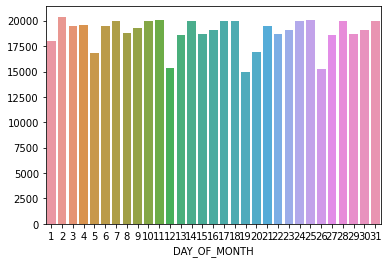

In [0]:
ax1= sns.barplot(x= nb_flight_by_daymonth_2019.index,y= nb_flight_by_daymonth_2019.values)

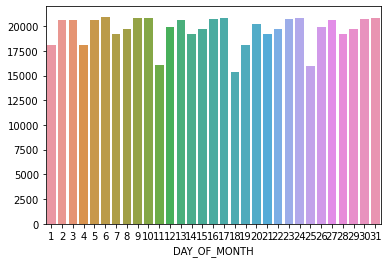

In [0]:
ax2= sns.barplot(x= nb_flight_by_daymonth_2020.index,y= nb_flight_by_daymonth_2020.values)

The trend of flight in two years quite the same. Let's look at cancelled flight

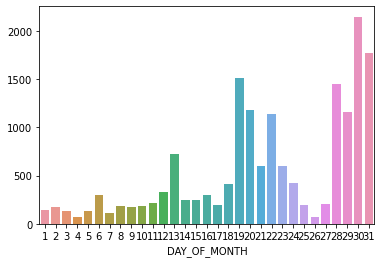

In [0]:
ax3= sns.barplot(x= nb_flight_by_daymonth_2019_cancel.index,y= nb_flight_by_daymonth_2019_cancel.values)

In 2019,in last few day of months usually have delay flight.

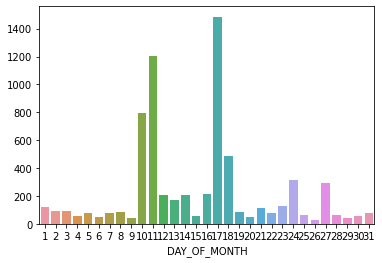

In [0]:
ax4= sns.barplot(x= nb_flight_by_daymonth_2020_cancel.index,y= nb_flight_by_daymonth_2020_cancel.values)

Besides that, in 2020, cancelled flight is in middle of months

In [0]:
Jan_2019_cancelled['TIME']= '2019'
Jan_2020_cancelled['TIME']='2020'
cancelled_flight= pd.concat([Jan_2019_cancelled,Jan_2020_cancelled])
cancelled_flight.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,TIME
397,1,2,AA,19805,AA,N965NN,178,14027,1402702,PBI,13930,1393007,ORD,NaN,NaN,0600-0659,NaN,NaN,1.0,0.0,1143.0,NaN,2019
403,1,2,AA,19805,AA,N9015D,189,11503,1150305,EGE,11298,1129806,DFW,NaN,NaN,0700-0759,NaN,NaN,1.0,0.0,721.0,NaN,2019
971,1,2,OH,20397,OH,N572NN,5103,11057,1105703,CLT,14193,1419306,PNS,1953.0,0.0,1900-1959,NaN,NaN,1.0,0.0,488.0,NaN,2019
1973,1,2,EV,20366,EV,N17984,4187,12448,1244807,JAN,12266,1226603,IAH,NaN,NaN,0900-0959,NaN,NaN,1.0,0.0,351.0,NaN,2019
1975,1,2,EV,20366,EV,N17984,4189,12266,1226603,IAH,12448,1244807,JAN,NaN,NaN,0700-0759,NaN,NaN,1.0,0.0,351.0,NaN,2019


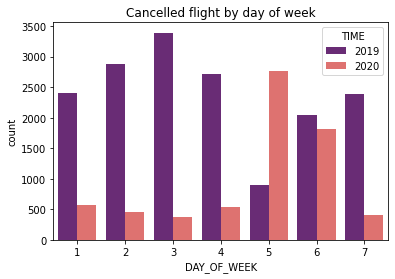

In [0]:
sns.countplot(x = 'DAY_OF_WEEK', hue='TIME', data=cancelled_flight, palette = 'magma')
plt.title('Cancelled flight by day of week')
plt.show()

In 2019, almost flights are cancelled some 3 days of week, but in 2020, friday and saturday is the time that flights are usually cancelled 

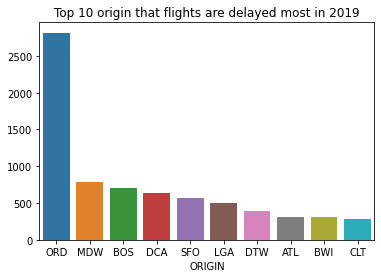

In [0]:
#the origin of flight that is delayed
most_delay_origin_2019= Jan_2019_cancelled.groupby('ORIGIN')['ORIGIN'].count()
most_delay_origin_2019.sort_values(ascending=False,inplace=True)
most_delay_origin_2019_top10 = most_delay_origin_2019[:10]
sns.barplot(x=most_delay_origin_2019_top10.index,y= most_delay_origin_2019_top10.values)
plt.title('Top 10 origin that flights are delayed most in 2019')
plt.show()

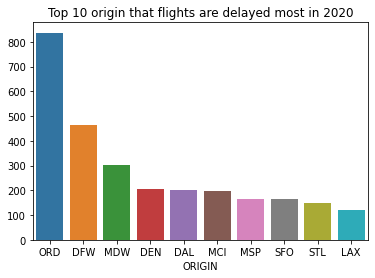

In [0]:
#the origin of flight that is delayed
most_delay_origin_2020= Jan_2020_cancelled.groupby('ORIGIN')['ORIGIN'].count()
most_delay_origin_2020.sort_values(ascending=False,inplace=True)
most_delay_origin_2020_top10 = most_delay_origin_2020[:10]
sns.barplot(x=most_delay_origin_2020_top10.index,y= most_delay_origin_2020_top10.values)
plt.title('Top 10 origin that flights are delayed most in 2020')
plt.show()

ORD in two years is leading place that the flights are delayed most

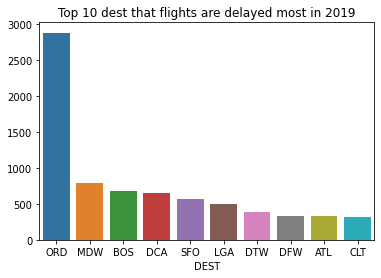

In [0]:
#the dest of flight that is delayed
most_delay_dest_2019= Jan_2019_cancelled.groupby('DEST')['DEST'].count()
most_delay_dest_2019.sort_values(ascending=False,inplace=True)
most_delay_dest_2019_top10 = most_delay_dest_2019[:10]
sns.barplot(x=most_delay_dest_2019_top10.index,y= most_delay_dest_2019_top10.values)
plt.title('Top 10 dest that flights are delayed most in 2019')
plt.show()

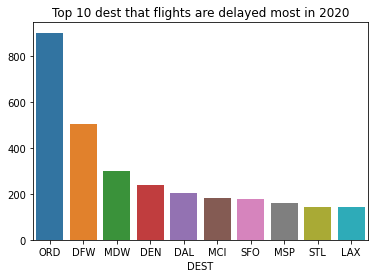

In [0]:
#the dest of flight that is delayed
most_delay_dest_2020= Jan_2020_cancelled.groupby('DEST')['DEST'].count()
most_delay_dest_2020.sort_values(ascending=False,inplace=True)
most_delay_dest_2020_top10 = most_delay_dest_2020[:10]
sns.barplot(x=most_delay_dest_2020_top10.index,y= most_delay_dest_2020_top10.values)
plt.title('Top 10 dest that flights are delayed most in 2020')
plt.show()

ORD is stil leading in term of destination. May be this destination airport is too crowded or some significant reason that make it busy.

In [0]:
cancelled_flight_diverted= cancelled_flight[cancelled_flight['DIVERTED']==1.]
#cancelled_flight['DIVERTED'].unique()
print('Rate of diverted perharps make the flights delayed: ',len(cancelled_flight_diverted)/len(cancelled_flight)*100, ' %')

Rate of diverted perharps make the flights delayed:  0.0  %


Rate shows that divertion doesn't make delay.

In [0]:
Jan_2019_ontime.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [0]:
# detect which column has missing values
def check_null(x):
  return any(x.isnull())
Jan_2019_ontime.apply(check_null)

DAY_OF_MONTH             False
DAY_OF_WEEK              False
OP_UNIQUE_CARRIER        False
OP_CARRIER_AIRLINE_ID    False
OP_CARRIER               False
TAIL_NUM                  True
OP_CARRIER_FL_NUM        False
ORIGIN_AIRPORT_ID        False
ORIGIN_AIRPORT_SEQ_ID    False
ORIGIN                   False
DEST_AIRPORT_ID          False
DEST_AIRPORT_SEQ_ID      False
DEST                     False
DEP_TIME                  True
DEP_DEL15                 True
DEP_TIME_BLK             False
ARR_TIME                  True
ARR_DEL15                 True
CANCELLED                False
DIVERTED                 False
DISTANCE                 False
Unnamed: 21               True
dtype: bool

In [0]:
Jan_2020_ontime.apply(check_null)

DAY_OF_MONTH             False
DAY_OF_WEEK              False
OP_UNIQUE_CARRIER        False
OP_CARRIER_AIRLINE_ID    False
OP_CARRIER               False
TAIL_NUM                  True
OP_CARRIER_FL_NUM        False
ORIGIN_AIRPORT_ID        False
ORIGIN_AIRPORT_SEQ_ID    False
ORIGIN                   False
DEST_AIRPORT_ID          False
DEST_AIRPORT_SEQ_ID      False
DEST                     False
DEP_TIME                  True
DEP_DEL15                 True
DEP_TIME_BLK             False
ARR_TIME                  True
ARR_DEL15                 True
CANCELLED                False
DIVERTED                 False
DISTANCE                 False
Unnamed: 21               True
dtype: bool

In [0]:
#count missing values in each column
missing_value_columns=['TAIL_NUM','DEP_TIME','DEP_DEL15','ARR_TIME','ARR_DEL15','Unnamed: 21']
print('In 2019')
for columns in missing_value_columns:
  miss_val= len(Jan_2019_ontime[Jan_2019_ontime[columns].isnull()])
  l= len(Jan_2019_ontime)
  print(columns,' has ',miss_val,' missing values over ', l, ', which accounts ',miss_val/l*100,'%')
print('In 2020')
for columns in missing_value_columns:
  miss_val= len(Jan_2020_ontime[Jan_2020_ontime[columns].isnull()])
  l= len(Jan_2020_ontime)
  print(columns,' has ',miss_val,' missing values over ', l, ', which accounts ',miss_val/l*100,'%')

In 2019
TAIL_NUM  has  2543  missing values over  583985 , which accounts  0.4354563901470072 %
DEP_TIME  has  16352  missing values over  583985 , which accounts  2.800071919655471 %
DEP_DEL15  has  16355  missing values over  583985 , which accounts  2.800585631480261 %
ARR_TIME  has  17061  missing values over  583985 , which accounts  2.9214791475808455 %
ARR_DEL15  has  18022  missing values over  583985 , which accounts  3.086038168788582 %
Unnamed: 21  has  583985  missing values over  583985 , which accounts  100.0 %
In 2020
TAIL_NUM  has  698  missing values over  607346 , which accounts  0.11492625291020274 %
DEP_TIME  has  6664  missing values over  607346 , which accounts  1.09723287878738 %
DEP_DEL15  has  6699  missing values over  607346 , which accounts  1.1029956565121035 %
ARR_TIME  has  7075  missing values over  607346 , which accounts  1.164904354354849 %
ARR_DEL15  has  8078  missing values over  607346 , which accounts  1.3300490988662146 %
Unnamed: 21  has  6073

**Unnamed: 21** column has 100% of missing values so it is useless, we drop it. And other columns have also missing values but accounting quite small so we can replace missing value which average or most frequent values of each column

In [0]:
Jan_2019_ontime.drop(['Unnamed: 21'],axis=1, inplace= True)
Jan_2020_ontime.drop(['Unnamed: 21'],axis=1, inplace= True)

In [0]:
Jan_2019_ontime.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


In [0]:
#['TAIL_NUM','DEP_TIME','DEP_DEL15','ARR_TIME','ARR_DEL15'], tail_num, dep_del15, arr_del15, replace with most freqent values, others is average
most_frequent_columns=['TAIL_NUM','DEP_DEL15','ARR_DEL15']
avg_values_columns=['DEP_TIME','ARR_TIME']
for columns in most_frequent_columns:
  Jan_2019_ontime[columns] = Jan_2019_ontime[columns].fillna(method='ffill')
  Jan_2020_ontime[columns] = Jan_2020_ontime[columns].fillna(method='ffill')
for columns in avg_values_columns:
  Jan_2019_ontime[columns] = Jan_2019_ontime[columns].fillna(Jan_2019_ontime[columns].mean())
  Jan_2020_ontime[columns] = Jan_2020_ontime[columns].fillna(Jan_2020_ontime[columns].mean())

In [0]:
# check after filling missing values
def check_null(x):
  return any(x.isnull())
Jan_2020_ontime.apply(check_null)

DAY_OF_MONTH             False
DAY_OF_WEEK              False
OP_UNIQUE_CARRIER        False
OP_CARRIER_AIRLINE_ID    False
OP_CARRIER               False
TAIL_NUM                 False
OP_CARRIER_FL_NUM        False
ORIGIN_AIRPORT_ID        False
ORIGIN_AIRPORT_SEQ_ID    False
ORIGIN                   False
DEST_AIRPORT_ID          False
DEST_AIRPORT_SEQ_ID      False
DEST                     False
DEP_TIME                 False
DEP_DEL15                False
DEP_TIME_BLK             False
ARR_TIME                 False
ARR_DEL15                False
CANCELLED                False
DIVERTED                 False
DISTANCE                 False
dtype: bool

ok, no missing values any more

In [0]:
Jan_2019_ontime.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


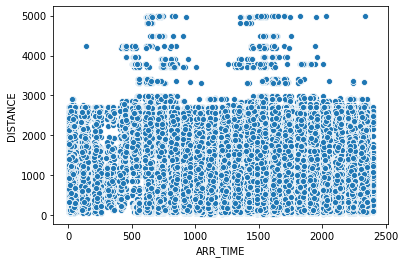

In [0]:
sns.scatterplot(x=Jan_2019_ontime['ARR_TIME'],y= Jan_2019_ontime['DISTANCE'])

It's normal. The time of flight depends on distance

Now we drop some useless columns to build a model to predict the delay of some flights

In [0]:
useless_columns= ['TAIL_NUM','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','DEP_TIME_BLK','CANCELLED']
X = pd.concat([Jan_2019_ontime,Jan_2020_ontime])
y = X['CANCELLED'].copy()
X.drop(useless_columns,axis=1, inplace=True)

Ok, let use some model to predict the delay

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
X_train, X_test, y_train, y_test= train_test_split(X, y , test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(953064, 16)
(238267, 16)


In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
#check data type of each columns
X.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
ARR_TIME                 float64
ARR_DEL15                float64
DIVERTED                 float64
DISTANCE                 float64
dtype: object

In [0]:
#X_num contain numerical columns and no labels
cat_attribs = ['OP_UNIQUE_CARRIER','OP_CARRIER','ORIGIN','DEST']
X_num= X.drop(cat_attribs, axis = 1)
num_attribs = list(X_num)

numerical_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

categorical_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", numerical_pipeline),
        ("cat_pipeline", categorical_pipeline),
    ])
X_prepared= full_pipeline.fit_transform(X_train)
X_test_prepared= full_pipeline.transform(X_test)

In [0]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score
def evaluate_model_classifier(y_train, y_predict):
  print('Confusion matrix: ', confusion_matrix(y_train, y_predict))
  print('Precision score: ', precision_score(y_train, y_predict))
  print('Recall score: ', recall_score(y_train, y_predict))
  sns.heatmap(pd.DataFrame(confusion_matrix(y_train, y_predict)))
  plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix:  [[233443     10]
 [  4812      2]]
Precision score:  0.16666666666666666
Recall score:  0.0004154549231408392


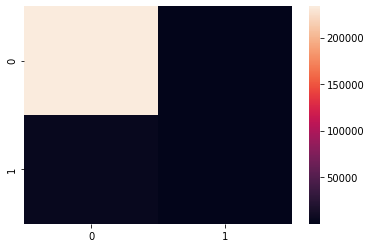

In [0]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(max_iter=100)
lr.fit(X_prepared,y_train)
y_predict= lr.predict(X_test_prepared)
evaluate_model_classifier(y_test, y_predict)

Confusion matrix:  [[233453      0]
 [  4814      0]]
Precision score:  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score:  0.0


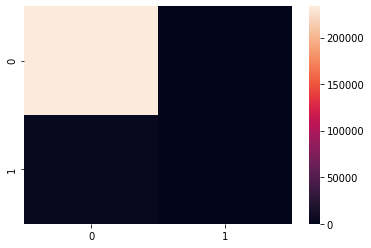

In [0]:
from sklearn.linear_model import SGDClassifier

sgdc= SGDClassifier()
sgdc.fit(X_prepared,y_train)
y_pred = sgdc.predict(X_test_prepared)
evaluate_model_classifier(y_test,y_pred)